<a href="https://colab.research.google.com/github/Hjjooo/-/blob/main/%EC%A1%B0%ED%98%9C%EC%A7%84/%EA%B2%BD%EA%B8%B0%EC%84%A0%ED%96%89%EC%A7%80%EC%88%98_%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 24.7 MB/s eta 0:00:00


In [ ]:
from pykrx import stock
import pandas as pd
from datetime import datetime, timedelta
from pandas_datareader import data as pdr

# 10년 전 날짜 설정
end_date = "2024-10-31"
start_date = (datetime.strptime(end_date, "%Y-%m-%d") - timedelta(days=365*10)).strftime("%Y-%m-%d")

# pykrx로 상장된 종목코드와 이름 가져오기
tickers = stock.get_market_ticker_list(market="KOSPI")
ticker_info = {ticker: stock.get_market_ticker_name(ticker) for ticker in tickers}

# 데이터프레임 초기화
stock_data_list = []

# 각 종목의 주식 데이터 가져오기 (pykrx 사용)
for ticker, name in ticker_info.items():
    try:
        # 특정 종목의 주식 데이터 가져오기
        df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)

        # 필요한 정보만 추출
        df_krx = df_krx[['종가']].reset_index()
        df_krx['ticker'] = ticker
        df_krx['name'] = name
        df_krx.rename(columns={'종가': 'close', '날짜': 'date'}, inplace=True)

        # 결과를 리스트에 추가
        stock_data_list.append(df_krx)

    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")

# 모든 데이터를 하나의 데이터프레임으로 결합
if stock_data_list:
    df_stock_data = pd.concat(stock_data_list, ignore_index=True)
else:
    df_stock_data = pd.DataFrame(columns=['date', 'ticker', 'name', 'close'])

# 고유 종목 코드와 종목명만 확인
unique_stocks = df_stock_data[['ticker', 'name']].drop_duplicates().reset_index(drop=True)

# 종목 코드와 이름 간략 조회
print("코스피 종목 코드 및 이름 조회:")
print(unique_stocks)

# 데이터프레임의 간단한 요약 정보 확인
df_summary = df_stock_data.describe(include='all')
print("\n데이터프레임 요약 정보:")
print(df_summary)

# 코스피 지수 데이터를 가져와 데이터프레임으로 저장
kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].dropna()
# 인덱스 초기화를 하지 않고 유지합니다 (시계열 분석을 위해 날짜 인덱스 유지)
print("\n코스피 지수 종가 데이터:")
print(kospi_index)

코스피 종목 코드 및 이름 조회:
     ticker     name
0    095570   AJ네트웍스
1    006840    AK홀딩스
2    027410      BGF
3    282330   BGF리테일
4    138930  BNK금융지주
..      ...      ...
953  079980      휴비스
954  005010      휴스틸
955  000540     흥국화재
956  000545    흥국화재우
957  003280     흥아해운

[958 rows x 2 columns]

데이터프레임 요약 정보:
                                 date         close   ticker     name
count                         2146959  2.146959e+06  2146959  2146959
unique                            NaN           NaN      958      958
top                               NaN           NaN   004450     삼화왕관
freq                              NaN           NaN     2458     2458
mean    2020-01-03 08:07:09.633915136  3.943451e+04      NaN      NaN
min               2014-11-03 00:00:00  2.000000e+01      NaN      NaN
25%               2017-07-14 00:00:00  4.305000e+03      NaN      NaN
50%               2020-02-11 00:00:00  1.180200e+04      NaN      NaN
75%               2022-07-06 00:00:00  3.720000e+04      NaN

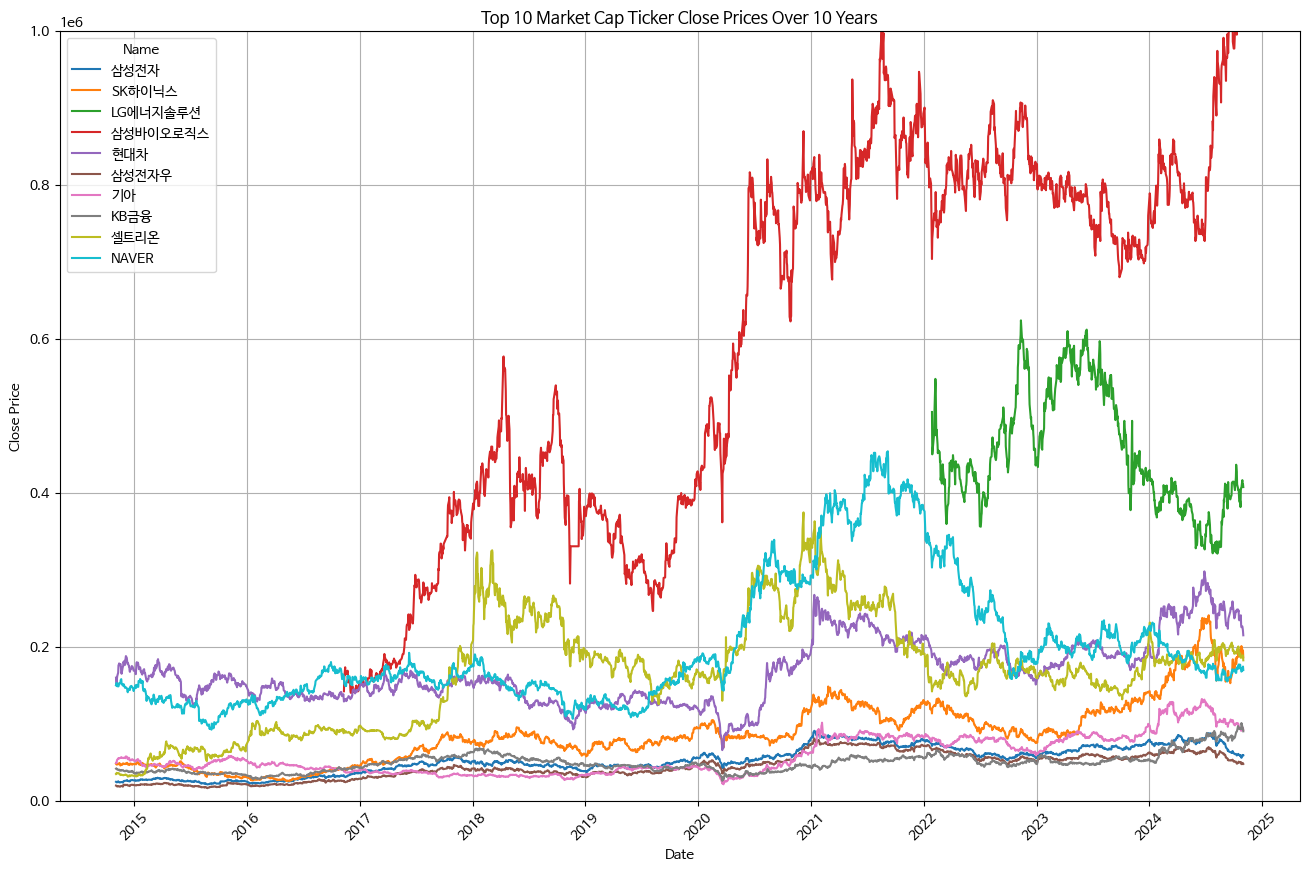

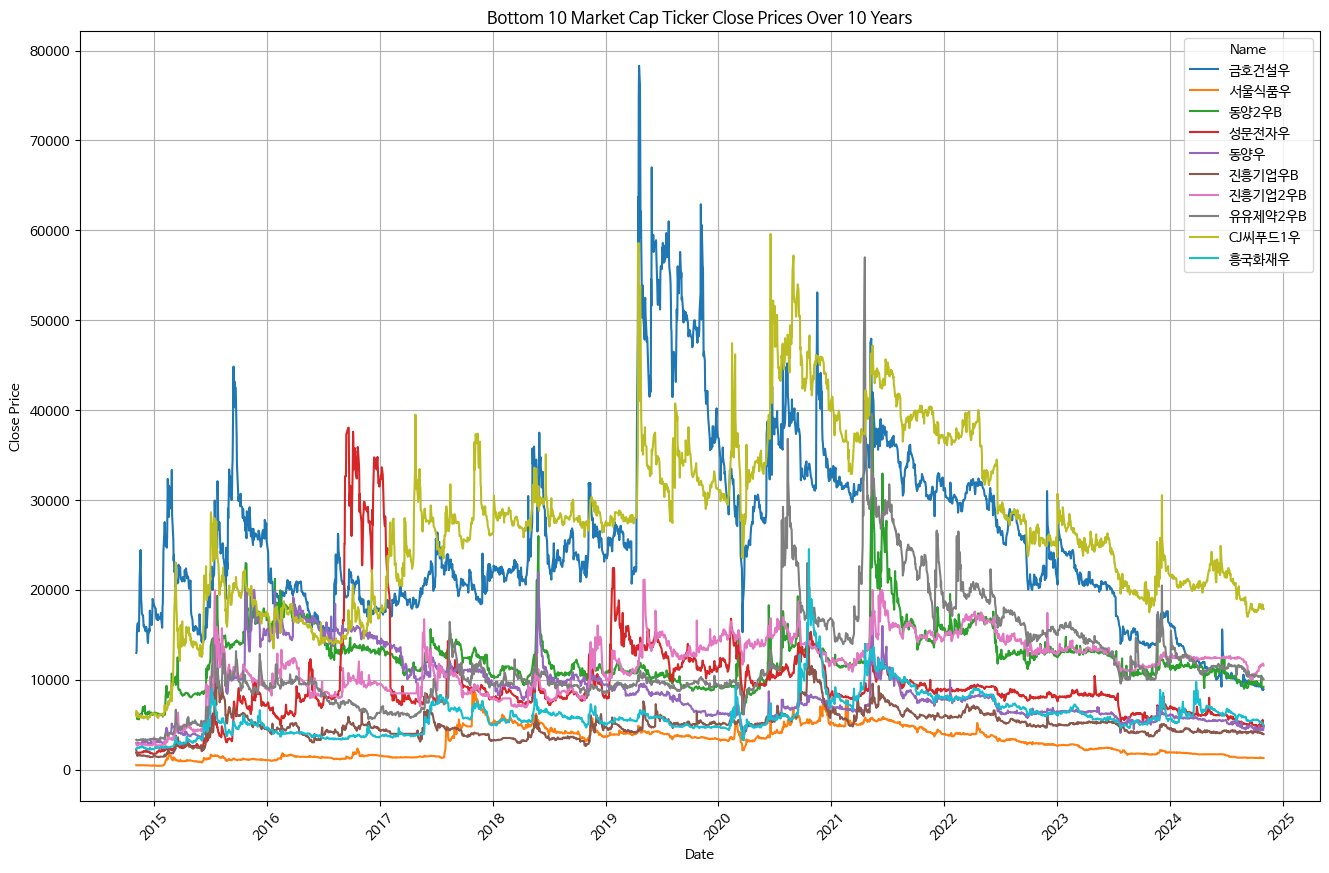

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 상위 10개와 하위 10개 ticker 리스트를 각각 추출
top_10_tickers = top_10_market_cap  # 상위 10개 시가총액 ticker 리스트
bottom_10_tickers = bottom_10_market_cap  # 하위 10개 시가총액 ticker 리스트

# 그래프 크기 설정
plt.figure(figsize=(16, 10))

# 상위 10개 ticker별 시계열 그래프 그리기
for ticker in top_10_tickers:
    ticker_data = df_filtered[df_filtered['ticker'] == ticker]
    plt.plot(ticker_data['date'], ticker_data['close'], label=ticker_data['name'].iloc[0])

# x축을 연도별로 표시
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# y축 범위 조정 (예시: 0부터 1e6까지)
plt.ylim(0, 1e6)  # y축 범위 지정

# 그래프 제목 및 축 레이블 설정
plt.title('Top 10 Market Cap Ticker Close Prices Over 10 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title="Name")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 하위 10개 그래프
plt.figure(figsize=(16, 10))

# 하위 10개 ticker별 시계열 그래프 그리기
for ticker in bottom_10_tickers:
    ticker_data = df_filtered[df_filtered['ticker'] == ticker]
    plt.plot(ticker_data['date'], ticker_data['close'], label=ticker_data['name'].iloc[0])

# x축을 연도별로 표시
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 그래프 제목 및 축 레이블 설정
plt.title('Bottom 10 Market Cap Ticker Close Prices Over 10 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title="Name")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd

# 경기종합지수 데이터 불러오기 (파일 이름을 실제 업로드한 파일명으로 변경)
economic_data = pd.read_csv('/경기종합지수.csv')
economic_data


,시점,선행종합지수(2020=100),선행종합지수 전월비(%),재고순환지표(전월차)(%p),경제심리지수(전월차)(p),기계류내수출하지수(선박제외)(전월비)(%),건설수주액(전월비)(%),수출입물가비율(전월비)(%),코스피(전월비)(%),장단기금리차(전월차)(%p),...,비농림어업취업자수(전월비)(%),동행지수 순환변동치,〔순환변동치 전월차〕(p).1,후행종합지수(2020=100),후행종합지수 전월비(%),생산자제품재고지수(전월비)(%),소비자물가지수변화율(서비스)(전월차)(%p),소비재수입액(전월비)(%),취업자수(전월비)(%),CP유통수익률(전월차)(%p)
0,2014.10,81.2,0.4,-0.5,0.1,-0.2,1.4,1.2,-1.3,0.03,...,0.1,99.3,-0.4,85.1,0.1,0.1,0.0,0.7,0.1,-0.1
1,2014.11,81.5,0.4,2.1,-0.2,1.7,-16.4,1.7,-1.7,-0.03,...,0.0,99.0,-0.3,85.3,0.2,0.2,0.0,0.1,0.0,-0.1
2,2014.12,81.8,0.4,2.1,-1.5,-0.8,-6.8,2.2,-1.7,-0.02,...,0.1,99.3,0.3,85.4,0.1,-0.6,0.0,-1.5,0.0,0.0
3,2015.01,82.3,0.6,1.7,0.7,-0.6,14.0,2.8,-0.4,-0.06,...,0.2,99.3,0.0,85.6,0.2,-0.8,0.0,1.1,0.1,0.0
4,2015.02,82.6,0.4,-0.8,1.8,-0.6,8.5,1.6,0.0,-0.07,...,0.2,99.7,0.4,85.8,0.2,-0.1,0.0,3.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024.05,115.2,0.3,0.3,0.2,-3.1,-1.8,0.3,1.0,0.04,...,-0.2,99.1,-0.6,115.2,0.1,-0.3,-0.1,1.1,-0.2,0.0
116,2024.06,115.7,0.4,0.8,0.8,-1.7,19.7,0.5,0.6,-0.04,...,-0.1,99.0,-0.1,115.4,0.2,-0.8,-0.1,-0.2,-0.1,0.0
117,2024.07 p),116.0,0.3,-2.3,0.5,-0.4,4.1,0.5,1.7,-0.13,...,0.0,98.3,-0.7,115.5,0.1,-0.1,0.0,-1.5,-0.1,-0.1
118,2024.08 p),116.2,0.2,0.6,0.1,-0.5,-2.4,0.3,-0.8,-0.17,...,0.1,98.3,0.0,115.8,0.3,0.4,0.0,0.9,0.0,-0.2


In [ ]:
# 경기종합지수 데이터의 열 이름 확인
print("경기종합지수 데이터 열 이름:")
print(economic_data.columns)

경기종합지수 데이터 열 이름:
Index(['시점', '선행종합지수(2020=100)', '선행종합지수 전월비(%)', '재고순환지표(전월차)(%p)',
       '경제심리지수(전월차)(p)', '기계류내수출하지수(선박제외)(전월비)(%)', '건설수주액(전월비)(%)',
       '수출입물가비율(전월비)(%)', '코스피(전월비)(%)', '장단기금리차(전월차)(%p)', '선행지수 순환변동치',
       '〔순환변동치 전월차〕(p)', '선행지수 전년동월비(%)', '〔전년동월비 전월차〕(%p)',
       '동행종합지수(2020=100)', '동행종합지수 전월비(%)', '광공업생산지수(전월비)(%)',
       '서비스업생산지수(도소매업제외)(전월비)(%)', '건설기성액(전월비)(%)', '소매판매액지수(전월비)(%)',
       '내수출하지수(전월비)(%)', '수입액(전월비)(%)', '비농림어업취업자수(전월비)(%)', '동행지수 순환변동치',
       '〔순환변동치 전월차〕(p).1', '후행종합지수(2020=100)', '후행종합지수 전월비(%)',
       '생산자제품재고지수(전월비)(%)', '소비자물가지수변화율(서비스)(전월차)(%p)', '소비재수입액(전월비)(%)',
       '취업자수(전월비)(%)', 'CP유통수익률(전월차)(%p)'],
      dtype='object')


In [ ]:
# 상위 10개와 하위 10개 ticker 리스트를 각각 추출
top_10_tickers = top_10_market_cap  # 상위 10개 ticker 리스트
bottom_10_tickers = bottom_10_market_cap  # 하위 10개 ticker 리스트

# 상위 10개 그룹 데이터 필터링 및 날짜 형식 변환
top_10_data = df_filtered[df_filtered['ticker'].isin(top_10_tickers)].copy()
top_10_data['date'] = pd.to_datetime(top_10_data['date'])
top_10_data.set_index('date', inplace=True)
top_10_monthly = top_10_data.groupby(['ticker', pd.Grouper(freq='ME')])['close'].last().reset_index()

# 하위 10개 그룹 데이터 필터링 및 날짜 형식 변환
bottom_10_data = df_filtered[df_filtered['ticker'].isin(bottom_10_tickers)].copy()
bottom_10_data['date'] = pd.to_datetime(bottom_10_data['date'])
bottom_10_data.set_index('date', inplace=True)
bottom_10_monthly = bottom_10_data.groupby(['ticker', pd.Grouper(freq='ME')])['close'].last().reset_index()

# 경기종합지수 데이터의 '시점' 열에서 불필요한 부분 제거
economic_data['시점'] = economic_data['시점'].str.replace(r'[^0-9.]', '', regex=True)

# '시점' 열을 datetime 형식으로 변환 (형식이 "YYYY.MM"인 경우)
economic_data['시점'] = pd.to_datetime(economic_data['시점'], format='%Y.%m')

# '시점'을 인덱스로 설정
economic_data.set_index('시점', inplace=True)

# 경기종합지수 데이터를 월말 기준으로 변경
economic_data.index = economic_data.index + pd.offsets.MonthEnd(0)

# 상관분석 함수 정의
def correlation_analysis(stock_data, economic_data, group_name):
    # 'date' 열을 기준으로 데이터 병합
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    merged_data = pd.merge(stock_data, economic_data, left_on='date', right_index=True, how='inner')

    # 각 ticker와 경기종합지수 열 간 상관관계 계산
    correlation_results = {}
    for ticker in merged_data['ticker'].unique():
        ticker_data = merged_data[merged_data['ticker'] == ticker]
        correlation_results[ticker] = ticker_data.corr()['close'].drop('close')

    # 상관관계 결과 출력
    print(f"\n{group_name} 그룹의 상관관계 결과:")
    for ticker, correlations in correlation_results.items():
        print(f"\n{ticker} 종목과 경기종합지수 간 상관관계:")
        print(correlations)

# 상위 10개와 하위 10개 각각 상관분석 수행
correlation_analysis(top_10_monthly, economic_data, "상위 10개")
correlation_analysis(bottom_10_monthly, economic_data, "하위 10개")



상위 10개 그룹의 상관관계 결과:

000270 종목과 경기종합지수 간 상관관계:
ticker                           NaN
date                        0.764096
선행종합지수(2020=100)            0.796095
선행종합지수 전월비(%)               0.070183
재고순환지표(전월차)(%p)             0.071773
경제심리지수(전월차)(p)              0.169715
기계류내수출하지수(선박제외)(전월비)(%)    -0.009000
건설수주액(전월비)(%)              -0.023605
수출입물가비율(전월비)(%)            -0.009280
코스피(전월비)(%)                 0.069571
장단기금리차(전월차)(%p)            -0.140637
선행지수 순환변동치                  0.192994
〔순환변동치 전월차〕(p)              0.087206
선행지수 전년동월비(%)               0.120278
〔전년동월비 전월차〕(%p)             0.031227
동행종합지수(2020=100)            0.744418
동행종합지수 전월비(%)               0.062993
광공업생산지수(전월비)(%)             0.064726
서비스업생산지수(도소매업제외)(전월비)(%)    0.214774
건설기성액(전월비)(%)              -0.143671
소매판매액지수(전월비)(%)            -0.102196
내수출하지수(전월비)(%)             -0.115138
수입액(전월비)(%)                 0.018716
비농림어업취업자수(전월비)(%)           0.167388
동행지수 순환변동치                 -0.039925
〔순환변동치 전월차〕(p).1           


상위 10개 그룹의 상관관계 결과:
000270 종목과 선행종합지수 간 상관관계: 0.7960952124595916
000660 종목과 선행종합지수 간 상관관계: 0.8765745672735479
005380 종목과 선행종합지수 간 상관관계: 0.6545712277828406
005930 종목과 선행종합지수 간 상관관계: 0.9127947301116462
005935 종목과 선행종합지수 간 상관관계: 0.8955794207757514
035420 종목과 선행종합지수 간 상관관계: 0.5449371906432934
068270 종목과 선행종합지수 간 상관관계: 0.5392751645964808
105560 종목과 선행종합지수 간 상관관계: 0.6329458893616278
207940 종목과 선행종합지수 간 상관관계: 0.8973294428457634
373220 종목과 선행종합지수 간 상관관계: -0.5167638292016894

하위 10개 그룹의 상관관계 결과:
000227 종목과 선행종합지수 간 상관관계: 0.6083941814813338
000545 종목과 선행종합지수 간 상관관계: 0.5375608879094963
001525 종목과 선행종합지수 간 상관관계: -0.5253673030990944
001527 종목과 선행종합지수 간 상관관계: 0.07724601198648902
002785 종목과 선행종합지수 간 상관관계: 0.35502200996199923
002787 종목과 선행종합지수 간 상관관계: 0.6651573927205853
002995 종목과 선행종합지수 간 상관관계: -0.07056401596811913
004415 종목과 선행종합지수 간 상관관계: 0.23658636823081625
011155 종목과 선행종합지수 간 상관관계: 0.3773197020538323
014915 종목과 선행종합지수 간 상관관계: -0.08592678965098506


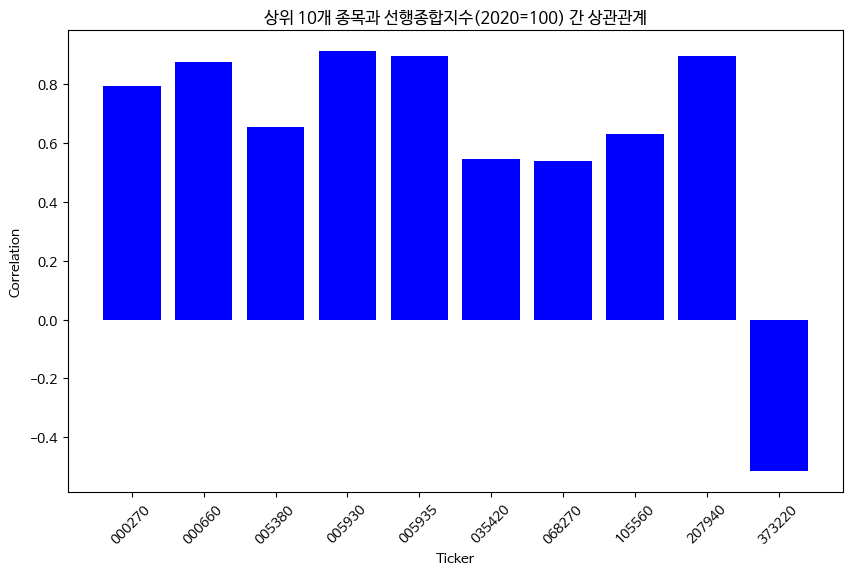

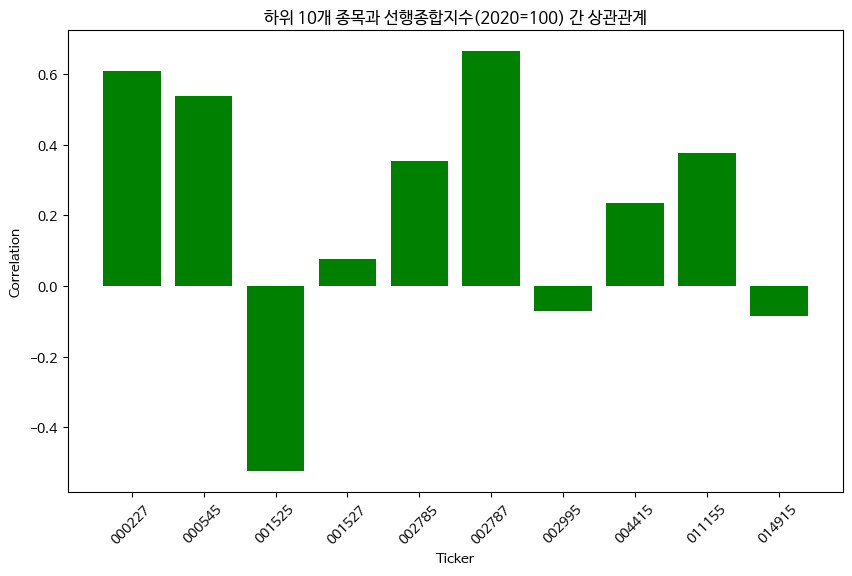

In [ ]:
# '선행종합지수(2020=100)' 열만 사용
economic_data = economic_data[['선행종합지수(2020=100)']]

# 상관분석 함수 정의 (특정 열에 대해 상관분석 수행)
def correlation_analysis(stock_data, economic_data, group_name):
    # 'date' 열을 기준으로 데이터 병합
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    merged_data = pd.merge(stock_data, economic_data, left_on='date', right_index=True, how='inner')

    # 각 ticker와 선행종합지수 간 상관관계 계산
    correlation_results = {}
    for ticker in merged_data['ticker'].unique():
        ticker_data = merged_data[merged_data['ticker'] == ticker]
        correlation = ticker_data['close'].corr(ticker_data['선행종합지수(2020=100)'])
        correlation_results[ticker] = correlation

    # 상관관계 결과 출력
    print(f"\n{group_name} 그룹의 상관관계 결과:")
    for ticker, correlation in correlation_results.items():
        print(f"{ticker} 종목과 선행종합지수 간 상관관계: {correlation}")

    return correlation_results

# 상관분석 수행
top_10_correlations = correlation_analysis(top_10_monthly, economic_data, "상위 10개")
bottom_10_correlations = correlation_analysis(bottom_10_monthly, economic_data, "하위 10개")

# 시각화
import matplotlib.pyplot as plt

# 상위 10개 상관관계 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_10_correlations.keys(), top_10_correlations.values(), color='blue')
plt.title("상위 10개 종목과 선행종합지수(2020=100) 간 상관관계")
plt.xlabel("Ticker")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()

# 하위 10개 상관관계 시각화
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_correlations.keys(), bottom_10_correlations.values(), color='green')
plt.title("하위 10개 종목과 선행종합지수(2020=100) 간 상관관계")
plt.xlabel("Ticker")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()
